# Alzheimer's Disease Prediction and Analysis
## David Santiago Buitrago Prada
### 23/09/25

# Hipótesis

The following features are risk factors to develop a positive Alzheimer diagnostic: MemoryComplaints, BehaiviorProblems. By the other side, good scores at the following features are sings of less propensity to develop a positive diagnostic: ADL, MMSE and Functional assestment.

# Data Loading

In [ ]:
# Import the kagglehub library to download datasets
import kagglehub

# Download the latest version of the specified dataset
# This downloads the dataset to a local path
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

# Print the local path where the dataset files are stored
print("Path to dataset files:", path)

100%|██████████| 268k/268k [00:00<00:00, 43.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


In [ ]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from the downloaded path into a pandas DataFrame
df = pd.read_csv(path + '/alzheimers_disease_data.csv')
# Drop the 'PatientID' column as it is not needed for the analysis
df = df.drop('PatientID', axis=1)
# Display the first few rows of the DataFrame to verify loading
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
# Display information about the DataFrame, including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

# EDA

In [ ]:
# Display descriptive statistics for the numerical columns in the DataFrame
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


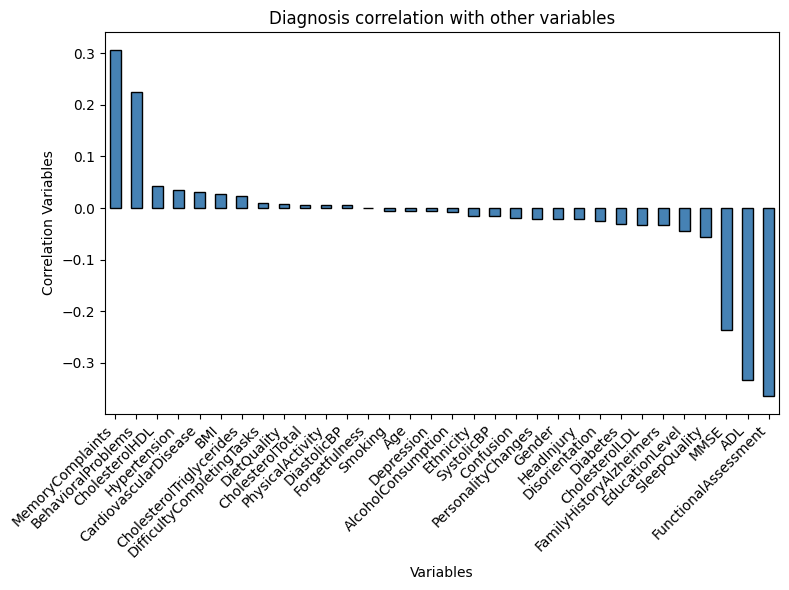

In [ ]:
# Calculate the correlation matrix for numerical columns
corr = df.corr(numeric_only=True)

# Sort the correlations of all variables with the 'Diagnosis' column and drop 'Diagnosis' itself
corr_with_diagnosis = corr['Diagnosis'].drop("Diagnosis").sort_values(ascending=False)

# Create a bar plot to visualize the correlations
plt.figure(figsize=(8,6))
corr_with_diagnosis.plot(kind='bar', color='steelblue', edgecolor='black')

# Set the title and labels for the plot
plt.title("Diagnosis correlation with other variables")
plt.xlabel("Variables")
plt.ylabel("Correlation Variables")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Display the plot
plt.show()

It is important to consider the following features for the analysis of the model: FunctionalAssessment, ADL, MMSE, MemoryComplaints and BehaviorProblems as they have considerable linear correlation with the target.

In [ ]:
# Import necessary functions for VIF calculation from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only the independent numerical variables for VIF calculation
# Exclude the target variable 'Diagnosis' and the non-numeric 'DoctorInCharge'
X = df.drop(columns=["Diagnosis", "DoctorInCharge"])
# Add a constant term to the independent variables to calculate VIF for the intercept
X_const = add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
# Calculate VIF for each column in the design matrix
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# Display the VIF values for each variable
vif_data

,Variable,VIF
0,const,229.391188
1,Age,1.016984
2,Gender,1.010787
3,Ethnicity,1.010825
4,EducationLevel,1.017640
5,BMI,1.016455
6,Smoking,1.014015
7,AlcoholConsumption,1.008737
8,PhysicalActivity,1.008959
9,DietQuality,1.014746


There's not enough evidence to conclude multicolineality between the independent variables and the diagnosis

# Normalization and PCA

## Scaling

In [ ]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

## Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Calculate the cumulative explained variance ratio, this shows the proportion of the dataset's variance that is explained by each principal component.

In [ ]:

explained_variance = np.cumsum(pca.explained_variance_ratio_)

print("Varianza explicada acumulada:", explained_variance)

Varianza explicada acumulada: [0.03782383 0.07525068 0.11217603 0.14884251 0.18436743 0.21954101
 0.25414472 0.2884104  0.32239645 0.35610685 0.38905397 0.42163379
 0.45399111 0.48577531 0.5175075  0.54863383 0.57938164 0.60966165
 0.63967719 0.6695745  0.69924995 0.7288079  0.75764297 0.78620547
 0.81439606 0.84224638 0.86948799 0.89632909 0.92298691 0.94919437
 0.97493207 1.        ]


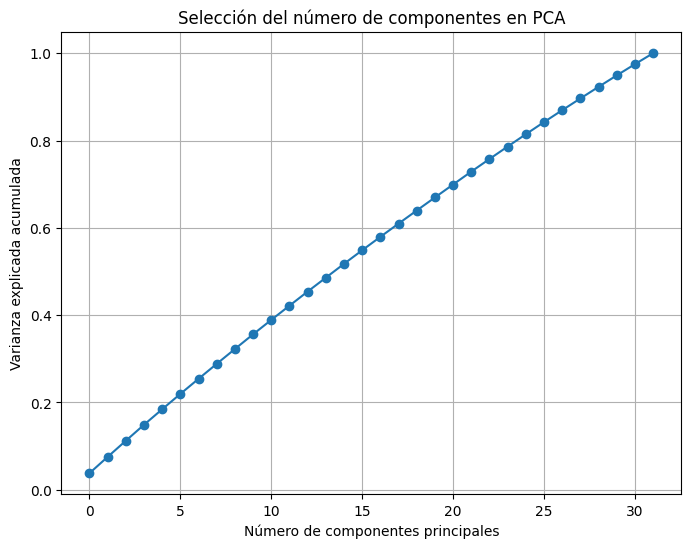

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(explained_variance, marker='o')

plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Selección del número de componentes en PCA")

plt.grid(True)
plt.show()

The graph shows a linear increase of the variability explained by the components. In orther to explain the 70% of the data 20 variables are required. Considering that the dataset includes 30 features and PCA makes more difficult the interpretability, for the model, the original variables will be used.

## train-test-split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression

In [ ]:
# Logistic Regression model using all independent variables as a baseline model
model_all = LogisticRegression(max_iter=1000, solver="liblinear")
model_all.fit(X_train, y_train)

# Predict on the test set
y_pred_all = model_all.predict(X_test)

print("Accuracy (todas las variables):", accuracy_score(y_test, y_pred_all))
print(classification_report(y_test, y_pred_all))

Accuracy (todas las variables): 0.8155038759689922
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.79      0.70      0.74       244

    accuracy                           0.82       645
   macro avg       0.81      0.79      0.80       645
weighted avg       0.81      0.82      0.81       645



# Logistic Regression + PCA

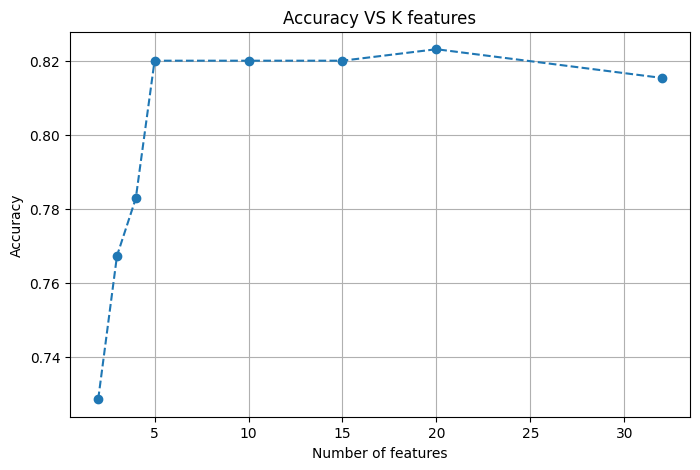

5 best variables ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL'] 

Accuracy (5 Best):  0.8201550387596899 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.80      0.70      0.75       244

    accuracy                           0.82       645
   macro avg       0.81      0.80      0.80       645
weighted avg       0.82      0.82      0.82       645



,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
FunctionalAssessment,-1.404356,0.095175,-14.755559,2.833354e-49,-1.590894,-1.217817
ADL,-1.300487,0.094755,-13.724707,7.222015e-43,-1.486203,-1.114770
const,-1.235134,0.089572,-13.789297,2.956283e-43,-1.410692,-1.059576
MemoryComplaints,1.130666,0.084233,13.423147,4.425176e-41,0.965574,1.295759
MMSE,-0.977430,0.085843,-11.386217,4.897962e-30,-1.145680,-0.809180
BehavioralProblems,0.907727,0.081933,11.078901,1.588100e-28,0.747141,1.068312


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# List of k values (number of features) to test for feature selection
k_values = [2, 3, 4, 5, 10, 15, 20, X.shape[1]]  # includes all variables
accuracies = [] # List to store accuracy for each k

# Loop through each k value
for k in k_values:
    # f_classif computes the ANOVA F-value for the provided (label, feature) tuples.
    selector = SelectKBest(score_func=f_classif, k=k)
    # Fit SelectKBest on the training data and transform both training and testing data
    # This selects the top k features based on the f_classif score
    X_train_k = selector.fit_transform(X_train, y_train)
    X_test_k = selector.transform(X_test)

    model = LogisticRegression(max_iter=1000, solver="liblinear")
    model.fit(X_train_k, y_train)

    y_pred = model.predict(X_test_k)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the accuracy for each k value to visualize the impact of feature selection on model performance
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="--")

plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Accuracy VS K features")

plt.grid(True)
plt.show()

# ==================================================
# Model with the 5 best features
# ==================================================

# Re-initialize SelectKBest to select the top 5 features based on the previous analysis or requirement
selector = SelectKBest(score_func=f_classif, k=5)
# Fit and transform the training and testing data using the selector
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# Get the boolean mask of selected features
mask = selector.get_support()
# Get the names of the selected features from the original DataFrame's columns
selected_features = X.columns[mask]
# Print the list of the selected top 5 features
print("5 best variables", selected_features.tolist(), '\n')

# Train a Logistic Regression model using the top 5 selected features
model_kbest = LogisticRegression(max_iter=1000, solver="liblinear")
model_kbest.fit(X_train_kbest, y_train)

# Predict on the test set with the model trained on selected features
y_pred_kbest = model_kbest.predict(X_test_kbest)

# Print the accuracy score for the model trained on the top 5 features
print("Accuracy (5 Best): ", accuracy_score(y_test, y_pred_kbest), '\n')

# Print the classification report for the model trained on the top 5 features
print(classification_report(y_test, y_pred_kbest))

# Create a pandas DataFrame from the transformed training data with selected feature names as columns
X_train_kbest_df = pd.DataFrame(X_train_kbest, columns=selected_features)
# Display the first few rows of the DataFrame with selected features
X_train_kbest_df.head()

# Extract the coefficients of the Logistic Regression model from sklearn
coef_sklearn = pd.Series(model_kbest.coef_[0], index=selected_features)

# Add the intercept to the coefficients Series
coef_sklearn["const"] = model_kbest.intercept_[0]
# Sort the coefficients by their absolute values in descending order
coef_sklearn = coef_sklearn.reindex(coef_sklearn.abs().sort_values(ascending=False).index)

# Display the sorted coefficients from the sklearn model
coef_sklearn

import statsmodels.api as sm

# Add a constant (intercept) to the training data with selected features for statsmodels
X_sm = sm.add_constant(X_train_kbest_df)
# Train a Logistic Regression model using statsmodels
# The dependent variable y_train is reset to align indices
model_sm = sm.Logit(y_train.reset_index(drop=True), X_sm).fit(disp=False) # model de regresión logística
# Get the summary table from the statsmodels model
summary = model_sm.summary2().tables[1]  # tabla con coeficientes y pruebas
# Sort the summary table by the absolute values of the coefficients in descending order
summary = summary.sort_values("Coef.", key=lambda s: s.abs(), ascending=False)
# Display the first 15 rows of the sorted summary table
summary.head(15)

# Conclusion


Selecting the most relevant features is a good practice, as it helps reduce noise in the model and improves performance. The weighted F1-score (0.82) indicates strong classification performance; however, the recall for the positive diagnosis (0.70) is lower. Since in this context false negatives are riskier than false positives, future research should consider adjusting the decision threshold to improve recall for the positive class and applying techniques to address class imbalance. Moreover, the results support the hypothesis, as the regression coefficients, their correlations with the target, and the K-best feature selection all suggest high predictive value using these particular caracteristic. In conclusion, logistic regression presents several advantages for this problem, as it enables a deeper interpretability analysis of the relationships between the variables and the target.